# Problem Statement:
**A UK based retail client wants to look into their transactional data sets and perform analytics to increase sales and improve customer loyalty. You are provided a sample data (attached with this mail) for your peruse. You are requested to look into this data set and use various analytical techniques/ algorithms to understand it better and come up with insights that business can use. Duration of data is from 01/12/2010 to 09/12/2011.**

# Dictionary:
**InvoiceNo:** Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.<br>
**StockCode:** Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.<br>
**Description:** Product (item) name. Nominal.<br>
**Quantity:** The quantities of each product (item) per transaction. Numeric.<br>
**InvoiceDate:** Invice Date and time. Numeric, the day and time when each transaction was generated.<br>
**UnitPrice:** Unit price. Numeric, Product price per unit in sterling.<br>
**CustomerID:** Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.<br>
**Country:** Country name. Nominal, the name of the country where each customer resides.

## Import necessary libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from pylab import rcParams
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report,plot_confusion_matrix
from sklearn import metrics

## Read the dataset

In [2]:
df=pd.read_excel('Online Retail.xlsx')
df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom


## Shape of dataset

In [3]:
df.shape

(541909, 8)

**Here, we see that dataset contains 541909 rows and 8 Columns**

## Info of dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


**Here, we see that out of 8 columns 1 is integer type, 1 is datetime, 2 are float type and 4 are object type. we also observe that most of columns don't have null values except  Description and Customer Id**

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,541909.0,9.552250,218.081158,-80995.00,1.00,3.00,10.00,80995.0
UnitPrice,541909.0,4.611114,96.759853,-11062.06,1.25,2.08,4.13,38970.0
CustomerID,406829.0,15287.690570,1713.600303,12346.00,13953.00,15152.00,16791.00,18287.0


**We see summary of the numerical variables and we observe that mean of Quantity is 9.55 and median of Quantity is 3. so we can say that distribution of Quantity is slightly skewed.<br>
We also see that mean of Unit price is 4.61 and median of Unit price is 2.08 which also indicate that distribution of unit price is also skewed one.<br>
We also observe that both Quantity and Unit price are facing the outliers problem because if we see 75% value of Quantity and Unit price which is 10 and 4.13 but if we see max value of Quantity and Unit price which is 80995 and 38970.**

In [6]:
df['StockCode'].value_counts()

85123A    2313
22423     2203
85099B    2159
47566     1727
20725     1639
          ... 
84803A       1
46037A       1
90181C       1
35594        1
84424A       1
Name: StockCode, Length: 4070, dtype: int64

In [7]:
df['Description'].value_counts()

WHITE HANGING HEART T-LIGHT HOLDER    2369
REGENCY CAKESTAND 3 TIER              2200
JUMBO BAG RED RETROSPOT               2159
PARTY BUNTING                         1727
LUNCH BAG RED RETROSPOT               1638
                                      ... 
wrongly marked. 23343 in box             1
mouldy, unsaleable.                      1
BLUE PAINTED KASHMIRI CHAIR              1
samples                                  1
BREAD BIN, DINER STYLE, IVORY            1
Name: Description, Length: 4223, dtype: int64

**We observe that highest sold product is White Hanging heart T-Light holder about 2369 order,<br> Second highest sold product is Regency cakestand 3 Tier about 2200 order,<br>Third highest sold product is Jumbo Bag red retrospot about 2159 orders,<br>Fourth highest sold product is Party bunting about 1727 orders,<br>Fifth highest sold product is Lunch bag red retrospot about 1638 orders.**

In [8]:
df['Quantity'].value_counts()

 1       148227
 2        81829
 12       61063
 6        40868
 4        38484
          ...  
 1287         1
-5368         1
 267          1
-244          1
 512          1
Name: Quantity, Length: 722, dtype: int64

In [9]:
df['Country'].value_counts()

United Kingdom          495478
Germany                   9495
France                    8557
EIRE                      8196
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               2002
Portugal                  1519
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Unspecified                446
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
Israel                     297
USA                        291
Hong Kong                  288
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58
Lebanon 

**We see that highest numbers of Transaction done by those customers who are from United kingdom about 495478,<br>Second highest transaction done by those customers who are from germany about 9495,<br>Third highest Transaction done by those customers who are from France about 8557,<br>Fourth highest transaction done by those customers who are from  EIRE about 8196,<br>Fifth highest transaction done by those customers who are from from Spain about 2533.**

**We also observe in last 5 rows that customers who are From Lithuania ,Brazil, Czech Republic, Bahrain and Saudi Arabia done very low transaction with retail store.**

## Checking null values

In [10]:
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [11]:
df.isnull().sum().sort_values(ascending = False)/df.index.size

CustomerID     0.249267
Description    0.002683
Country        0.000000
UnitPrice      0.000000
InvoiceDate    0.000000
Quantity       0.000000
StockCode      0.000000
InvoiceNo      0.000000
dtype: float64

**We see in above two table that Customer ID and Description contain some missing values so, we have to treat that missing values first.**

## Null value treatment
### For categorical variable we use mode imputation

In [12]:
for column in ['Description','CustomerID']:
    df[column].fillna(df[column].mode()[0], inplace=True)

**For treatment of missing values we use the mode imputation method because description is categorical column and customer id is unique column so mode imputation is better for this two columns.**

In [13]:
df.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

**We see in above table that now no such missing values are present in dataset**

## Checking duplicate data

In [14]:
df.duplicated().sum()

5268

In [15]:
df.groupby('Country').count().sort_values('Quantity',ascending=False)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID
Country,,,,,,,
United Kingdom,495478,495478,495478,495478,495478,495478,495478
Germany,9495,9495,9495,9495,9495,9495,9495
France,8557,8557,8557,8557,8557,8557,8557
EIRE,8196,8196,8196,8196,8196,8196,8196
Spain,2533,2533,2533,2533,2533,2533,2533
Netherlands,2371,2371,2371,2371,2371,2371,2371
Belgium,2069,2069,2069,2069,2069,2069,2069
Switzerland,2002,2002,2002,2002,2002,2002,2002
Portugal,1519,1519,1519,1519,1519,1519,1519


**We observe top 5 countries customers who done  highest transactions with retail store and these are the name of countries:<br> First is United kingdom about,<br>Second is germany,<br>Third is France,<br>Fourth is EIRE,<br>Fifth is Spain.**

**We also observe last 5 countries and customers from these countries are done very low transaction with retail store and these are the name of those countries:<br>Lithuania , <br>Brazil,<br> Czech Republic,<br> Bahrain<br> and Saudi Arabia.**

In [16]:
df.groupby('Country').mean().sort_values('Quantity',ascending=False)

,Quantity,UnitPrice,CustomerID
Country,,,
Netherlands,84.406580,2.738317,14420.302826
Sweden,77.136364,3.910887,14697.149351
Japan,70.441341,2.276145,12757.798883
Australia,66.444003,3.220612,12464.656076
Singapore,22.855895,109.645808,12744.000000
Denmark,21.048843,3.256941,12536.591260
Czech Republic,19.733333,2.938333,12781.000000
Lithuania,18.628571,2.841143,15332.000000
Canada,18.298013,6.030331,17321.079470


**We see in above table that highest average quantity order by those customers who are from Netherlands about 84.406580,<br> Second highest average quantity order by those customers who are from Sweden about 77.136364,<br> Third highest average quantity order by those customers who are from Japan about 70.441341,<br> Fourth highest average quantity order by those customers who are from Australia about 66.444003,<br> Fifth highest average quantity order by those customers who are from Singapore about 22.855895.**

**We see in above table that Lowest avreage quantity order by those customers who are from USA about 3.553265,<br>
Second Lowest average quantity order by those customers who are from RSA about 6.068966,<br>
Third Lowest average quantity order by those customers who are belong to Unspecified about 7.399103,<br>
Fourth Lowest average quantity order by those customers who are from Malta about 7.433071,<br>
Fifth Lowest average quantity order by those customers who are from Saudi Arabia about 7.500000.**


In [17]:
df.groupby('Country').mean().sort_values('UnitPrice',ascending=False)

,Quantity,UnitPrice,CustomerID
Country,,,
Singapore,22.855895,109.645808,12744.000000
Hong Kong,16.559028,42.505208,17841.000000
Portugal,10.651745,8.582976,12877.287031
Cyprus,10.155949,6.302363,12404.951768
Canada,18.298013,6.030331,17321.079470
Norway,17.722836,6.012026,12437.984346
EIRE,17.403245,5.911077,15016.678380
Finland,15.346763,5.448705,12517.012950
Lebanon,8.577778,5.387556,12764.000000


**We see in above table that customers who are from Singapore have highest average unit price of product about 109.645808,<br>
Customers who are from Hong Kong have Second highest average unit price of product about 42.505208,<br>
Customers who are from Portugal have Third highest average unit price of product about 8.582976,<br>
Customers who are from Cyprus have Fourth highest average unit price of product about 6.302363,<br>
Customers who are from Canada have Fifth highest average unit price of product about 6.030331**

**We see in above table that Customers who are from USA have  Lowest average unit price of product about 2.216426,<br>
Customer who are from Japan have Second Lowest average unit price of product about 2.276145,<br>
Customer who are from Saudi Arabia have Third Lowest average unit price of product about 2.411000,<br>
Customer who are from Iceland have Fourth Lowest average unit price of product about 2.644011,<br>
Customer who are belong to Unspecified category have Fifth Lowest average unit price of product about 2.699574**

In [18]:
df.groupby('Description').count().sort_values('Quantity',ascending=False)

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
Description,,,,,,,
WHITE HANGING HEART T-LIGHT HOLDER,3823,3823,3823,3823,3823,3823,3823
REGENCY CAKESTAND 3 TIER,2200,2200,2200,2200,2200,2200,2200
JUMBO BAG RED RETROSPOT,2159,2159,2159,2159,2159,2159,2159
PARTY BUNTING,1727,1727,1727,1727,1727,1727,1727
LUNCH BAG RED RETROSPOT,1638,1638,1638,1638,1638,1638,1638
...,...,...,...,...,...,...,...
ORANGE FELT VASE + FLOWERS,1,1,1,1,1,1,1
OPULENT VELVET SET/3 CANDLES,1,1,1,1,1,1,1
OOPS ! adjustment,1,1,1,1,1,1,1


**We see in above table that highest demanding product is White Hanging Heart T-light Holder,<br>
Second highest demanded product is Regency cake stand 3 Tier,<br>
Third highest demanded product is Jumbo bag Red Retro spot,<br>
Fourth highest demanded product is Party Bunting,<br>
Fifth highest demanded product is Lunch Bag Red Retro Spot.**

**We also observe that some of least demanded product which is rarely order and the 5 lowest ordered products are:<br>
ORANGE FELT VASE + FLOWERS,<br>
OPULENT VELVET SET/3 CANDLES,<br>
OOPS ! adjustment,<br>
OOH LA LA DOGS COLLAR,<br>
wrongly sold sets.**

In [19]:
df.groupby('Description').mean().sort_values('Quantity',ascending=False)

,Quantity,UnitPrice,CustomerID
Description,,,
came coded as 20713,3100.0,0.000,17841.0
TEA TIME TEA TOWELS,1300.0,2.325,15749.0
did a credit and did not tick ret,1300.0,0.000,17841.0
wrongly coded 23343,1000.0,0.000,17841.0
Marked as 23343,400.0,0.000,17841.0
...,...,...,...
"mouldy, thrown away.",-2600.0,0.000,17841.0
wrongly marked. 23343 in box,-3100.0,0.000,17841.0
throw away,-5368.0,0.000,17841.0


**We see above table and observe that based on average quantity highest ordered product is "came coded as 20713" about 3100 quantity,<br>
Based on average quantity Second highest ordered product is "TEA TIME TEA TOWELS" about 1300 quantity,<br>
Based on average quantity Third highest ordered product is "did a credit and did not tick ret" about 1300 quantity,<br>
Based on average quantity Fourth highest ordered product is "wrongly coded 23343" about 1000 quantity,<br> 
Based on average quantity Fifth highest ordered product is "Marked as 23343" about 400 quantity.**

**We see in above table that there are also some least ordered product based on average quantity and those products are:<br>
mouldy, thrown away,<br>
wrongly marked. 23343 in box,<br>
throw away,<br>
Printing smudges/thrown away,<br>
printing smudges/thrown away,<br>**

In [20]:
df.groupby('Description').mean().sort_values('UnitPrice',ascending=False)

,Quantity,UnitPrice,CustomerID
Description,,,
AMAZON FEE,-0.882353,7324.784706,17841.000000
PICNIC BASKET WICKER 60 PIECES,30.500000,649.500000,15098.000000
CRUK Commission,-1.000000,495.839375,14096.000000
Manual,5.533217,374.914266,15755.155594
DOTCOM POSTAGE,0.997179,290.905585,17756.486601
...,...,...,...
add stock to allocate online orders,2.000000,0.000000,17841.000000
adjust,-53.000000,0.000000,17841.000000
adjustment,20.500000,0.000000,17841.000000


**We see in above table that "Amazon fee" has highest average unit price about 7324.7847,<br>
"PICNIC BASKET WICKER 60 PIECES" has Second highest average unit price about 649.500000,<br>
"CRUK Commission" has Third highest average unit price about 495.839375,<br>
"Manual" has Fourth highest average unit price about 374.914266,<br>
"DOTCOM POSTAGE" has Fifth highest average unit price about 290.905585**

**We also see in above table that many products have 0 unit price or negative unit price which are given below:<br>
"add stock to allocate online orders" has unit price about 0.0<br>
"adjust" has unit price about 0.0,<br>
"adjustment" has unit price about 0.0,<br>
"wrongly sold sets" has unit price about 0.0,<br>
"Adjust bad debt" has unit price about -3687.353333**

In [21]:
df['InvoiceNo'].str.contains('c').sum()

0

## Outliers Checking

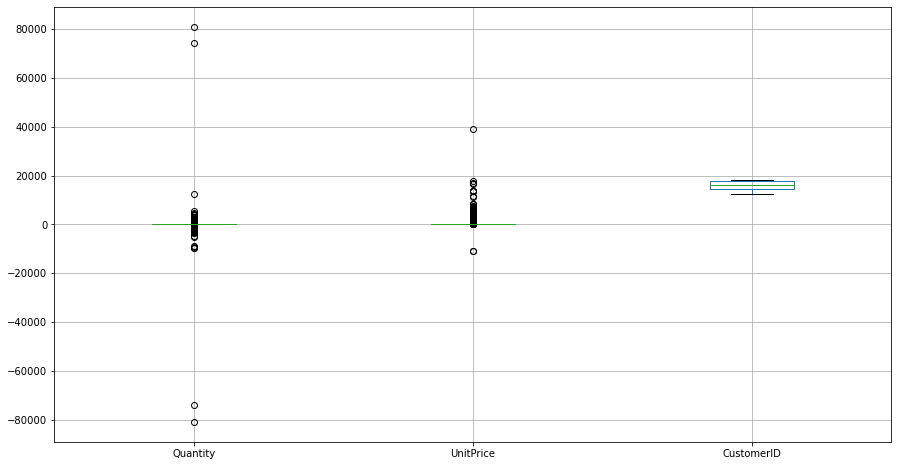

In [22]:
plt.figure(figsize=(15,8))
df.boxplot();

**We see in above boxplot that quantity and unit price are facing the outlier problem. so, we have to treat that outlier problem before going for further analysis.**

## Outlier treatment

In [23]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [24]:
lr,ur=remove_outlier(df["Quantity"])
df["Quantity"]=np.where(df["Quantity"]>ur,ur,df["Quantity"])
df["Quantity"]=np.where(df["Quantity"]<lr,lr,df["Quantity"])

lr,ur=remove_outlier(df["UnitPrice"])
df["UnitPrice"]=np.where(df["UnitPrice"]>ur,ur,df["UnitPrice"])
df["UnitPrice"]=np.where(df["UnitPrice"]<lr,lr,df["UnitPrice"])


**For treatment of those outliers we are using the IQR capping method in which we cap the outliers at upper(Q3+1.5IQR) and lower(Q1-1.5IQR) limit**

## Outlier checking

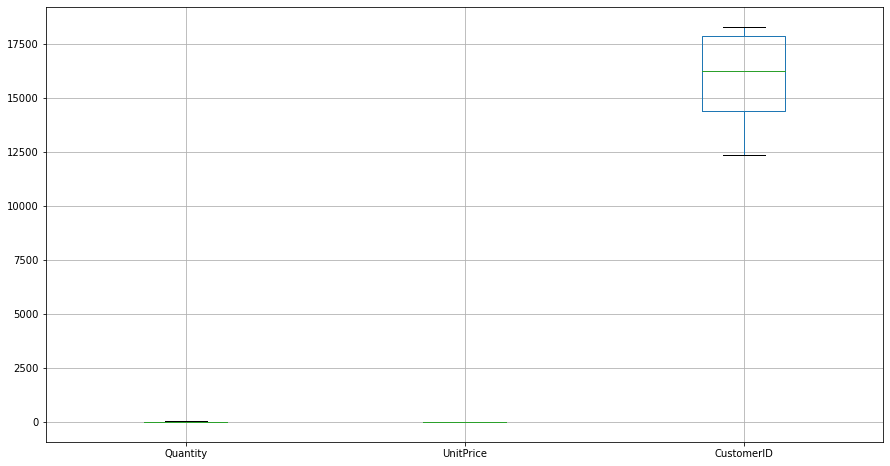

In [25]:
plt.figure(figsize=(15,8))
df.boxplot();

**We see in above boxplot that there are no outliers present in dataset. so, now we go for further analysis**

## Univariate Analysis

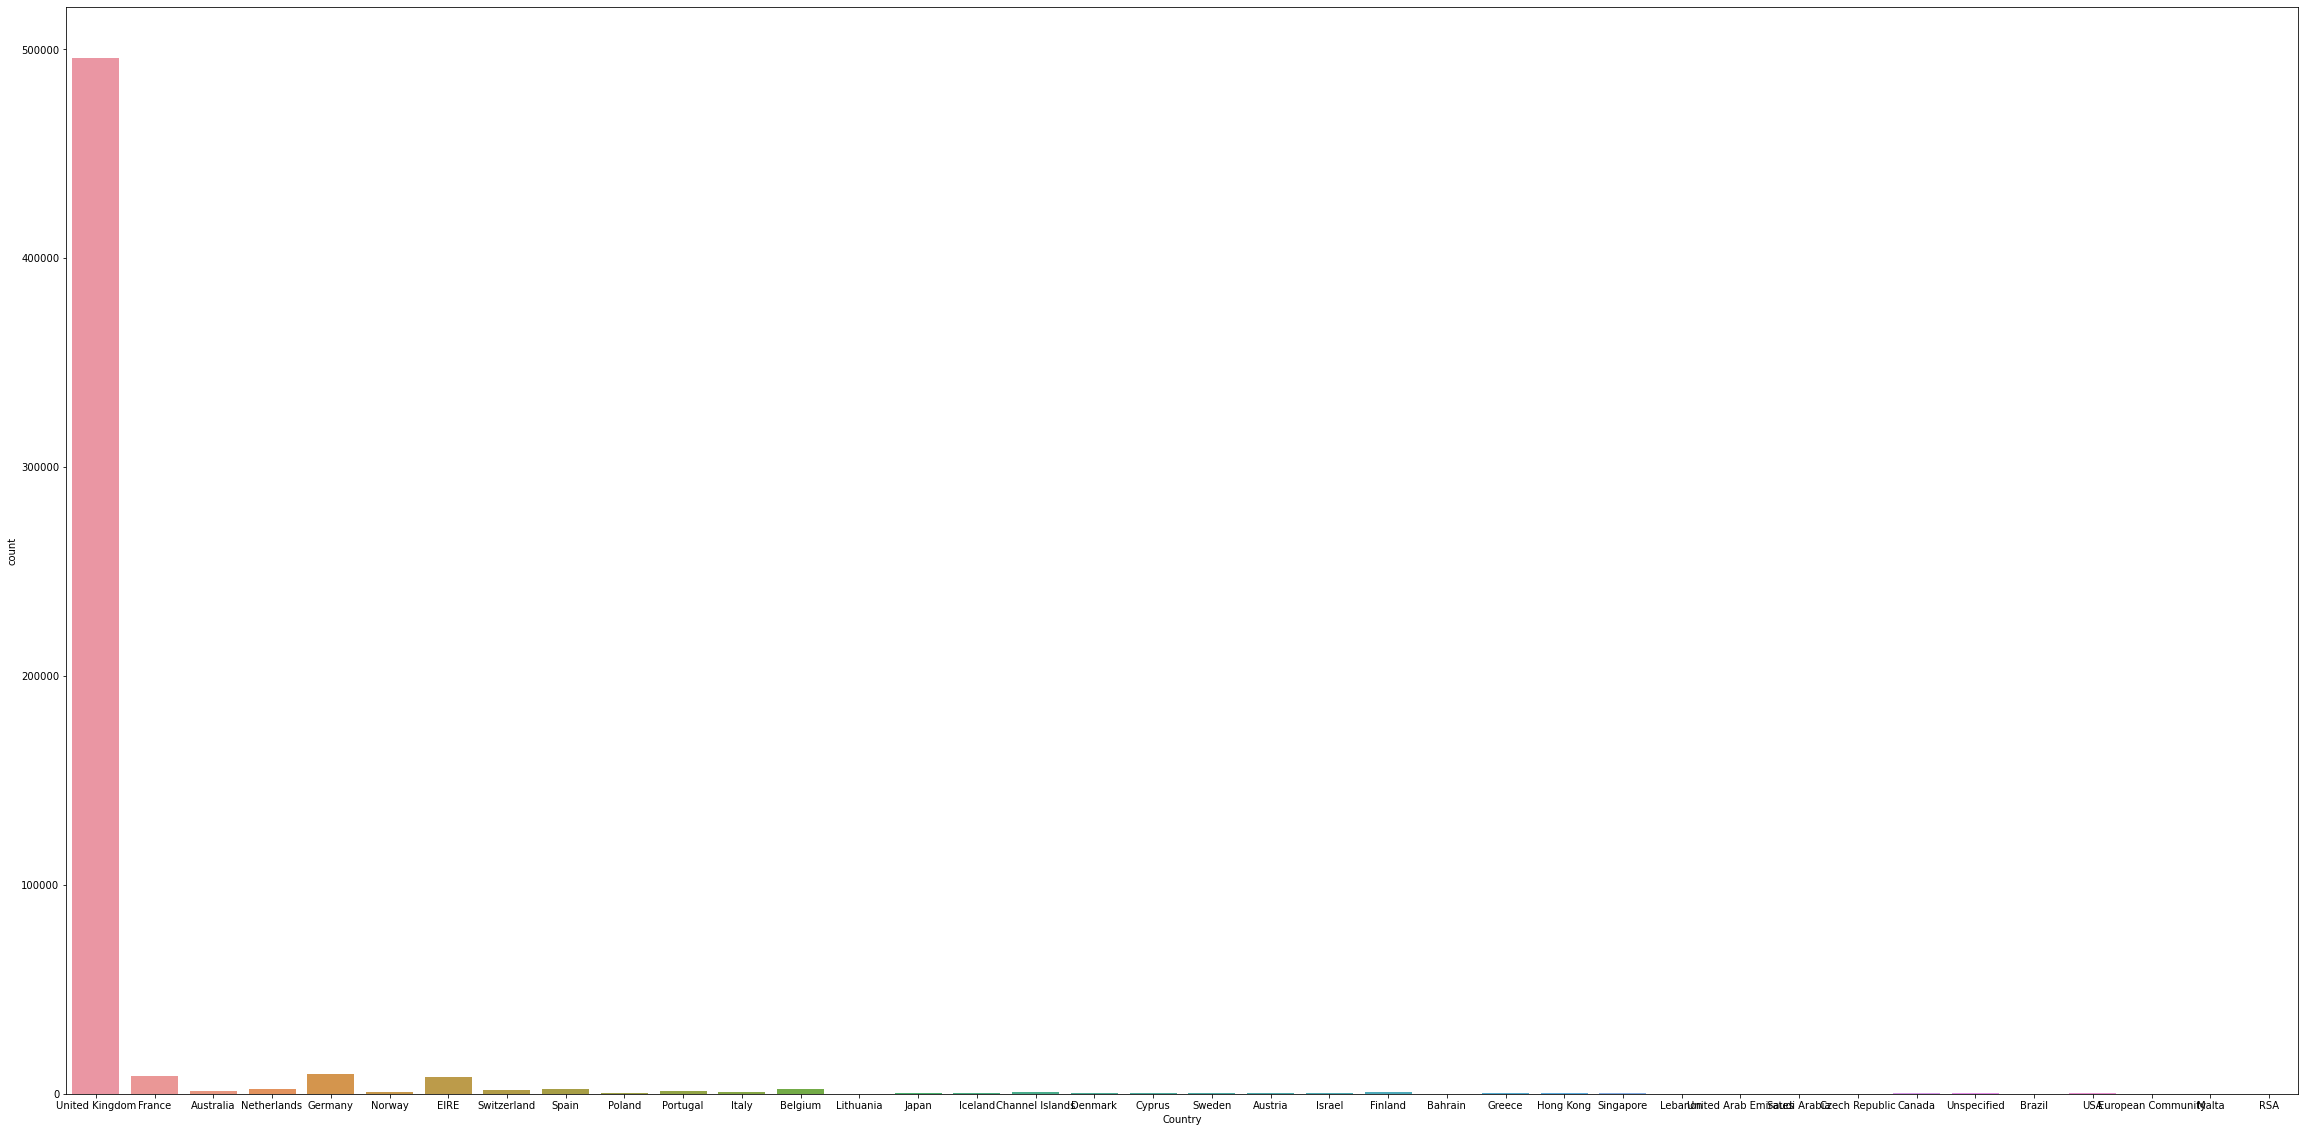

In [26]:
plt.figure(figsize=(40,20))
sns.countplot(df['Country']);

**We see in above countplot that highest number of transaction done by those customers who are from United kingdom,<br>
Second highest number of transaction done by those customers who are from France,<br>
Third highest number of transaction done by those customers who are from Australia,<br>
Fourth highest number of transaction done by those customers who are from Netherlands,<br>
Fifth highest number of transaction done by those customers who are from Germany.**

**We see in above countplot that Lowest number of transaction done by those customers who are from RSA,<br>
Second Lowest number of transaction done by those customers who are from Malta,<br>
Third Lowest number of transaction done by those customers who are from Community,<br>
Fourth Lowest number of transaction done by those customers who are from European,<br>
Fifth Lowest number of transaction done by those customers who are from USA.**

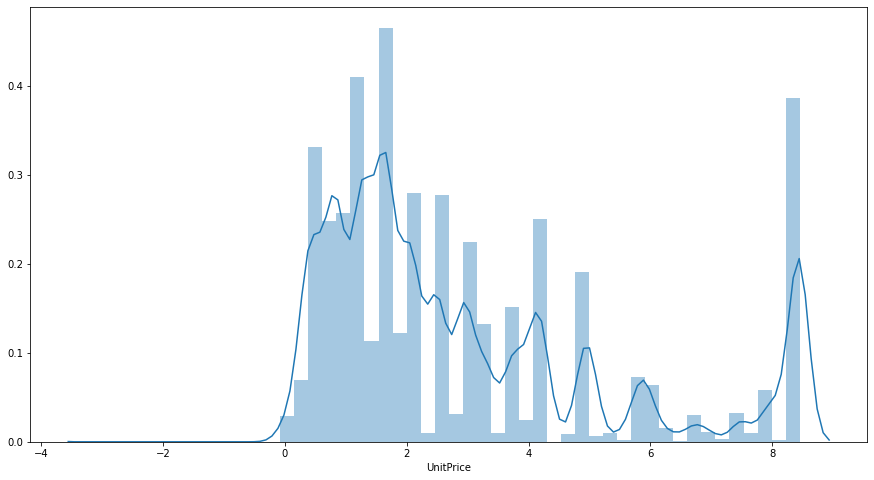

In [27]:
plt.figure(figsize=(15,8))
sns.distplot(df['UnitPrice']);

**We see in above histogram and we observe that most of unit Price is distributed between  0 to 4 and we said that because most of peaks are seen between 0 and 4 but we also observe some higher peaks after 8 means we can say that some products also have higher unit price which is above 8.<br>
We also observe that Unit price is not normally distributed it is skewed one.**

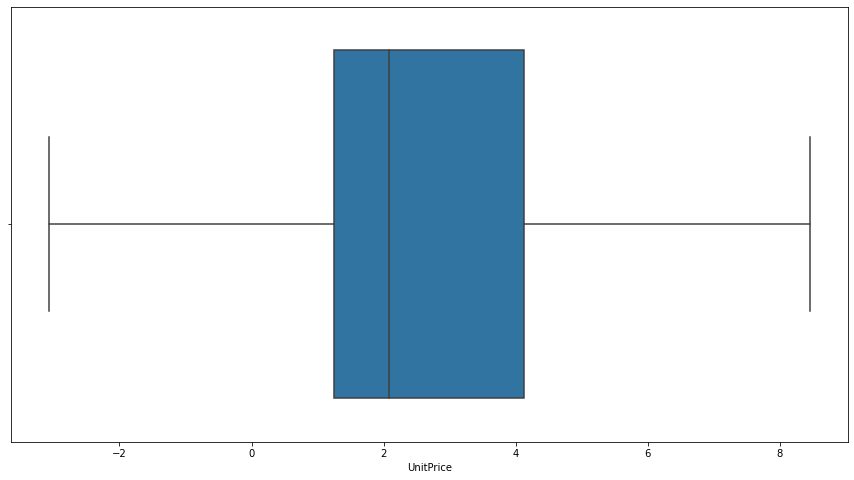

In [28]:
plt.figure(figsize=(15,8))
sns.boxplot(df['UnitPrice']);

**We see in above boxplot that unit price is distributed between 0 to 4 and we also observe that it is skewed one(Positive skew)**

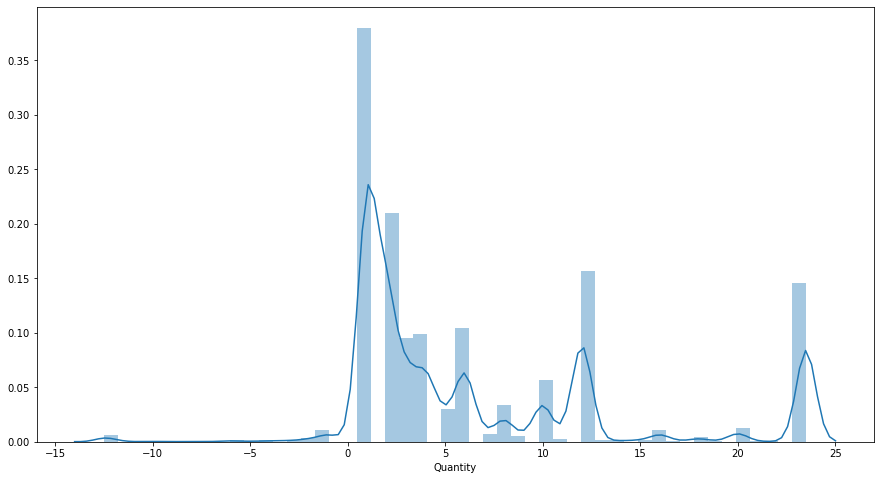

In [29]:
plt.figure(figsize=(15,8))
sns.distplot(df['Quantity']);

**We see in above histogram of Quantity and we observe that most of quantity is between 0 to 5 and we can say that because most of peaks are seen between 0 and 5. we also seen some peaks between 10 and 15 & 20 and 25 that means there are some customers who ordered very high quantity of products.**

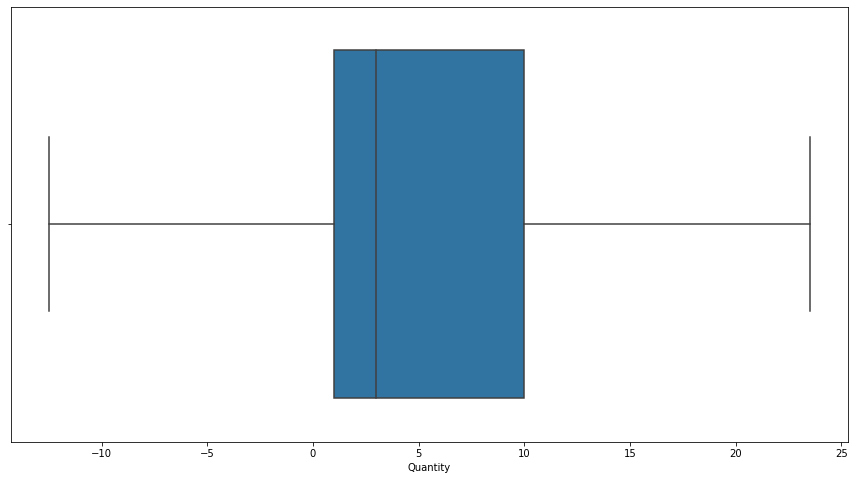

In [30]:
plt.figure(figsize=(15,8))
sns.boxplot(df['Quantity']);

**We see in above boxplot of quantity and we observe that distribution of boxplot is between 0 to 10. we also observe that this boxplot is also skewed one and it is positively skewed.**

## Bivariate and Multivariate Analysis

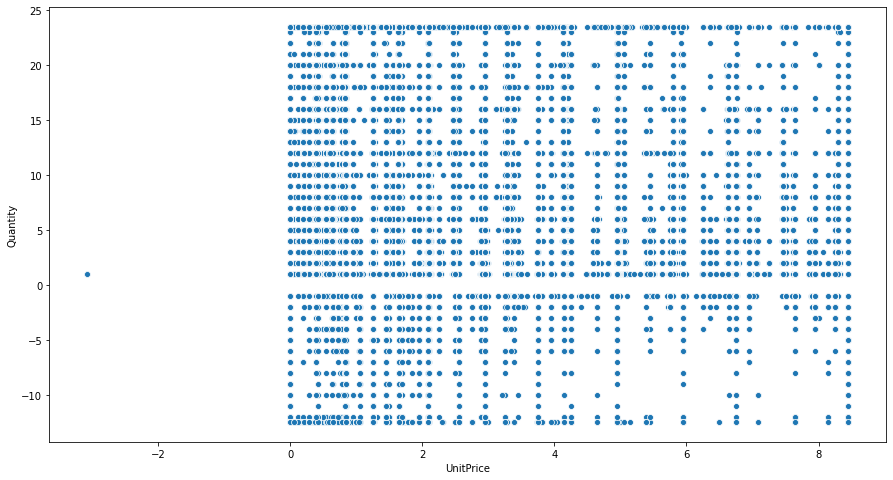

In [31]:
plt.figure(figsize=(15,8))
sns.scatterplot(df.UnitPrice,df.Quantity);

**We see scatterplot of unit price and Quantity above and we observe that there are no linear relationship between unit price and quantity. it is look like cloud relationship.**

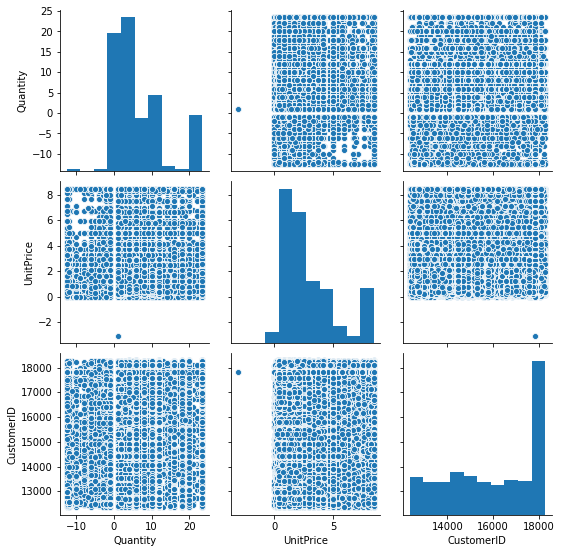

In [32]:
sns.pairplot(df);

**We see in above pair plot and we observe that there are no linear relationship between target variable unit price and other independent variable means for this dataset linear regression model cant perfrom well.**

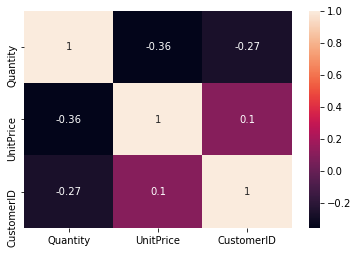

In [33]:
sns.heatmap(df.corr(),annot=True);

**We see heatmap of numerical variables and we observe that there are negative correlation between Unit price and Quantity about -0.36 and correlation between Customer id and Quantity is -0.27.** 

## Converting dataset into Time series fromat for analysing Trend

In [34]:
df1=pd.read_excel('Online Retail.xlsx',parse_dates=True,index_col='InvoiceDate')
df1.head()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country
InvoiceDate,,,,,,,
2010-12-01 08:26:00,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850.0,United Kingdom
2010-12-01 08:26:00,536365,71053,WHITE METAL LANTERN,6,3.39,17850.0,United Kingdom
2010-12-01 08:26:00,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850.0,United Kingdom
2010-12-01 08:26:00,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850.0,United Kingdom
2010-12-01 08:26:00,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850.0,United Kingdom


In [35]:
df1=df1[['UnitPrice','Quantity']]
df1.head()

,UnitPrice,Quantity
InvoiceDate,,
2010-12-01 08:26:00,2.55,6
2010-12-01 08:26:00,3.39,6
2010-12-01 08:26:00,2.75,8
2010-12-01 08:26:00,3.39,6
2010-12-01 08:26:00,3.39,6


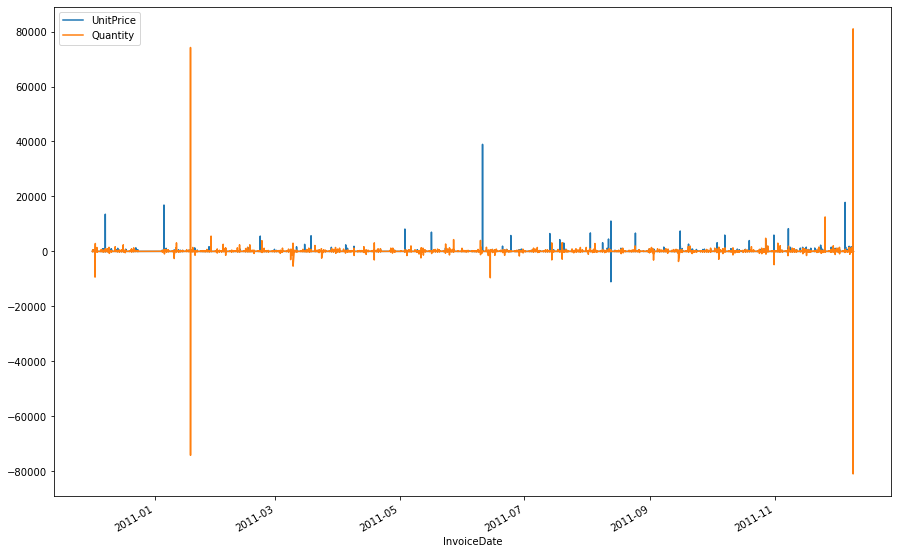

In [36]:
rcParams['figure.figsize']=15,10
df1.plot();

**We see in above graph and we observe that there are no increase or decrease in trend of unit price. its look like steady flow of unit price.**

## Clustering
**We know that for applying clustering we must have to convert all the data into numerical and after that we have to standardise that numerical data first and for standardise the data we apply standard scaler on data.**

In [37]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [38]:
from sklearn.preprocessing import StandardScaler

In [39]:
X = StandardScaler()

In [40]:
for feature in df.columns: 
    if df[feature].dtype == 'object': 
        df[feature] = pd.Categorical(df[feature]).codes

In [41]:
df_1=df.drop(['InvoiceNo','StockCode','InvoiceDate','CustomerID'],axis=1)
df_1.head()

,Description,Quantity,UnitPrice,Country
0,3918,6.0,2.55,36
1,3926,6.0,3.39,36
2,913,8.0,2.75,36
3,1910,6.0,3.39,36
4,2911,6.0,3.39,36


In [42]:
scaled_df = X.fit_transform(df_1)

In [43]:
scaled_df

array([[ 1.55321339, -0.06713864, -0.16869146,  0.27965099],
       [ 1.56018412, -0.06713864,  0.18040372,  0.27965099],
       [-1.06516868,  0.20690581, -0.08557356,  0.27965099],
       ...,
       [-1.20806873, -0.34118308,  0.49625174, -3.41640162],
       [-1.20894007, -0.34118308,  0.49625174, -3.41640162],
       [-1.59581583, -0.47820531,  0.82872334, -3.41640162]])

In [44]:
from sklearn.cluster import KMeans 
k_means = KMeans(n_clusters = 2)

In [45]:
k_means.fit(scaled_df)

KMeans(n_clusters=2)

In [46]:
k_means.inertia_

1643690.3960567147

In [47]:
wss =[] 

In [48]:
for i in range(1,11):
    KM = KMeans(n_clusters=i)
    KM.fit(scaled_df)
    wss.append(KM.inertia_)

In [49]:
wss

[2167635.999999593,
 1643690.396204512,
 1211830.4635828629,
 908679.7623614765,
 672816.885844642,
 597003.0791588963,
 539195.1857905308,
 486064.1652147939,
 442644.2797236493,
 404304.5505190537]

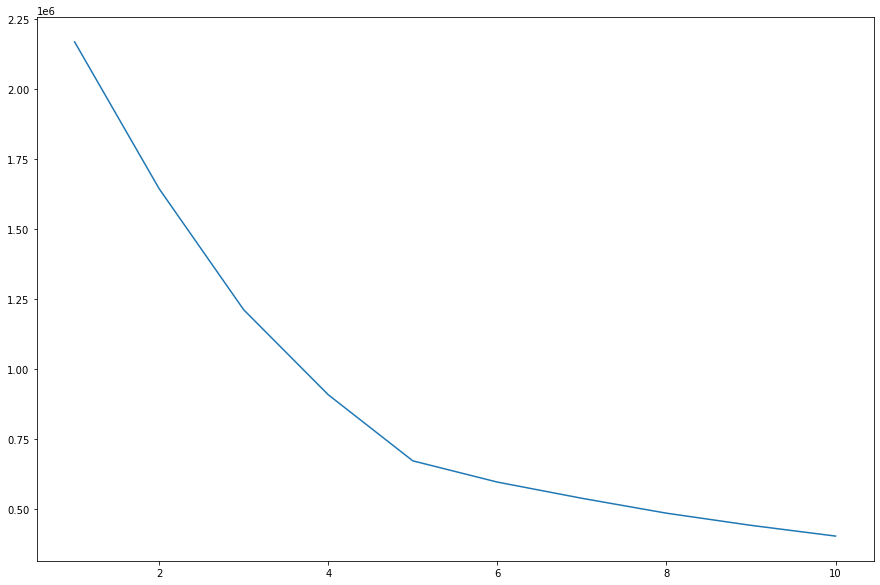

In [50]:
plt.plot(range(1,11), wss);

**We see in above graph that upto 5 line is significantly droped bt after 5 drop become gradual so, we can say that 5 is significant value for K.**

In [51]:
k_means = KMeans(n_clusters = 5)
k_means.fit(scaled_df)
labels = k_means.labels_

In [52]:
df_1["Clus_kmeans"] = labels
df_1.head(10)

,Description,Quantity,UnitPrice,Country,Clus_kmeans
0,3918,6.0,2.55,36,0
1,3926,6.0,3.39,36,0
2,913,8.0,2.75,36,1
3,1910,6.0,3.39,36,1
4,2911,6.0,3.39,36,0
5,3158,2.0,7.65,36,4
6,1529,6.0,4.25,36,1
7,1653,6.0,1.85,36,1
8,1650,6.0,1.85,36,1
9,244,23.5,1.69,36,3


In [53]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,0,3670,3918,6.0,2010-12-01 08:26:00,2.55,17850.0,36
1,0,2537,3926,6.0,2010-12-01 08:26:00,3.39,17850.0,36
2,0,3348,913,8.0,2010-12-01 08:26:00,2.75,17850.0,36
3,0,3312,1910,6.0,2010-12-01 08:26:00,3.39,17850.0,36
4,0,3311,2911,6.0,2010-12-01 08:26:00,3.39,17850.0,36


In [54]:
df_clus=pd.read_excel('Online Retail.xlsx')
df_clus.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom


In [55]:
df_clus["Clus_kmeans"] = labels
df_clus.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Clus_kmeans
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,1
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,0
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom,4
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom,1
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,1
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,1
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom,3


In [56]:
df_clus.groupby('Clus_kmeans').count().sort_values('InvoiceNo',ascending=False)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
Clus_kmeans,,,,,,,,
1,187438,187438,187438,187438,187438,187438,139219,187438
0,172432,172432,171179,172432,172432,172432,125804,172432
4,87721,87721,87721,87721,87721,87721,51922,87721
3,59433,59433,59232,59433,59433,59433,56113,59433
2,34885,34885,34885,34885,34885,34885,33771,34885


**We see in above table that highest number of transaction done by those customers who are belong to cluster 1 and cluster 0 means these are very good and active customers for retail store. so, retail store owner must have to taken care of them and try to make friendly relationship with them.<br>
We also observe that lowest number of transaction done by those customers who are from cluster 2 and cluster 3 means these are very low perfromer and less active customers of retail store and have higher chance of churning. so, Retail store owner must have to focus on those customers who are belong to cluster 2 and cluster 3 and must have to find out the reason why they dont do more transaction with them and what problems they are facing with retail store. so, based on that retail store provide good service and attracting offers and discount offer to them and try to attract them. so they will stay with store for longer time.<br>
We also see that customers who belong to cluster 4 are average performer. so, we also have to focus on these category of customers and try to attract them with some advertisement, discount offers.so, they will do more transaction with retail store and become very good customer of Retail store and stay with store for long time.**

## Model Building 

In [57]:
X=df.drop(['UnitPrice','InvoiceNo','StockCode','InvoiceDate','CustomerID'],axis=1)
y=df['UnitPrice']
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=1)

In [58]:
x_train.head()

,Description,Quantity,Country
387168,368,23.5,36
310839,2106,12.0,36
519047,2493,12.0,36
440442,3796,2.0,36
213553,308,20.0,36


In [59]:
x_test.head()

,Description,Quantity,Country
94801,1833,-2.0,36
210111,1067,1.0,36
455946,112,23.5,36
403542,1604,16.0,36
471951,2709,12.0,14


In [60]:
y_train.head()

387168    2.49
310839    2.95
519047    0.39
440442    8.25
213553    0.42
Name: UnitPrice, dtype: float64

## Random Forest

In [61]:
from sklearn.ensemble import RandomForestRegressor

In [62]:
rfcl = RandomForestRegressor()
rfcl = rfcl.fit(x_train,y_train)

In [63]:
rfcl

RandomForestRegressor()

In [64]:
rfcl.score(x_train,y_train)

0.90021678203742

In [65]:
rfcl.score(x_test,y_test)

0.8651155332141968

In [66]:
RF_y_train_predict = rfcl.predict(x_train)
RF_y_test_predict = rfcl.predict(x_test)

In [67]:
np.sqrt(metrics.mean_squared_error(y_train,RF_y_train_predict))

0.7597742437652614

In [68]:
np.sqrt(metrics.mean_squared_error(y_test,RF_y_test_predict))

0.8845755492952154

**We see that out of all models random forest perform very well and give very good accuracy value for train and test, also random forest give very good RMSE value for train and test compared to other models. so, we can go with random forest.**

In [69]:
rfcl.feature_importances_

array([0.76403015, 0.21426   , 0.02170985])

In [70]:
print (pd.DataFrame(rfcl.feature_importances_, columns = ["Imp"], index = x_train.columns))

                 Imp
Description  0.76403
Quantity     0.21426
Country      0.02171


**We see that random forest give the feature importance value of diffrent variables and we observe that out of all variables Description has very high value of feature importance means description plays major role for predicting Unit price and second most important variable is Quantity. so, Retail store must have to consider these two variables for predicting the Unit Price and want to increase sales.**

## Ada Boost

In [71]:
from sklearn.ensemble import AdaBoostRegressor

ADB_model = AdaBoostRegressor(n_estimators=100,random_state=1)
ADB_model.fit(x_train,y_train)

AdaBoostRegressor(n_estimators=100, random_state=1)

In [72]:
ADB_model.score(x_train,y_train)

0.06290615597018934

In [73]:
ADB_model.score(x_test,y_test)

0.06434862031505417

In [74]:
ADB_y_train_predict = ADB_model.predict(x_train)
ADB_y_test_predict = ADB_model.predict(x_test)

In [75]:
np.sqrt(metrics.mean_squared_error(y_train,ADB_y_train_predict))

2.328345132603002

In [76]:
np.sqrt(metrics.mean_squared_error(y_test,ADB_y_test_predict))

2.329758968400543

## Gradient Boost

In [77]:
from sklearn.ensemble import GradientBoostingRegressor
gbcl = GradientBoostingRegressor(random_state=1)
gbcl = gbcl.fit(x_train, y_train)

In [78]:
gbcl.score(x_train,y_train)

0.3614635435207263

In [79]:
gbcl.score(x_test,y_test)

0.3620472759521969

In [80]:
GB_y_train_predict = gbcl.predict(x_train)
GB_y_test_predict = gbcl.predict(x_test)

In [81]:
np.sqrt(metrics.mean_squared_error(y_train,GB_y_train_predict))

1.9219791101970103

In [82]:
np.sqrt(metrics.mean_squared_error(y_test,GB_y_test_predict))

1.9237481232853524

## Linear Regression

In [83]:
lm=LinearRegression()

In [84]:
lm.fit(x_train,y_train)

LinearRegression()

In [85]:
lm.score(x_train,y_train)

0.13201116608498165

In [86]:
lm.score(x_test,y_test)

0.1332362125379648

In [87]:
predicted_train=lm.predict(x_train)
np.sqrt(metrics.mean_squared_error(y_train,predicted_train))

2.2408505003515926

In [88]:
predicted_test=lm.predict(x_test)
np.sqrt(metrics.mean_squared_error(y_test,predicted_test))

2.2423548504729647

# Insights From Analysis:

**We observe that highest sold products are "White Hanging heart T-Light holder", "Regency cakestand 3 Tier", "Jumbo Bag red retrospot", "Party bunting", "Lunch bag red retrospot".**<br>

**We also observe that some of least demanded product which is rarely order and the 5 lowest ordered products are ORANGE FELT, VASE + FLOWERS, OPULENT VELVET SET/3 CANDLES, OOPS ! adjustment, OOH LA LA DOGS COLLAR, wrongly sold sets.**

**We see that highest numbers of Transaction done by those customers who are from United kingdom, germany, France, EIRE, Spain.**<br>

**We also observe lowest transaction done by those customers who are from Lithuania, Brazil, Czech Republic, Bahrain and Saudi Arabia.**<br>

**We see in table that highest average quantity order by those customers who are from Netherlands, Second highest average quantity order by those customers who are from Sweden, Third highest average quantity order by those customers who are from Japan, Fourth highest average quantity order by those customers who are from Australia, Fifth highest average quantity order by those customers who are from Singapore.**<br>

**We see in table that Lowest average quantity order by those customers who are from USA, Second Lowest average quantity order by those customers who are from RSA, Third Lowest average quantity order by those customers who are belong to Unspecified category, Fourth Lowest average quantity order by those customers who are  from Malta, Fifth Lowest average quantity order by those customers who are from Saudi Arabia.**<br>

**We see table and observe that on basis of average quantity highest ordered products are "came coded as 20713", "TEA TIME TEA TOWELS", "did a credit and did not tick ret", "wrongly coded 23343", "Marked as 23343"**<br>

**We see in table that there are also some least ordered product based on average quantity and those products are mouldy, thrown away, wrongly marked.23343 in box, throw away, Printing smudges/thrown away, printing smudges/thrown away<br>**

**We see in table that "Amazon fee" has highest average unit price, "PICNIC BASKET WICKER 60 PIECES" has Second highest average unit price, "CRUK Commission" has Third highest average unit price, "Manual" has Fourth highest average unit price, "DOTCOM POSTAGE" has Fifth highest average unit price**<br>

**We see in table that many products have 0 unit price or negative unit price which are "add stock to allocate online orders" has unit price about 0.0, "adjust" has unit price about 0.0, "adjustment" has unit price about 0.0, "wrongly sold sets" has unit price about 0.0, "Adjust bad debt" has unit price about -3687.353333**<br>

**We see in countplot that highest number of transaction done by those customers who are from United kingdom, Second highest from France, Third highest from Australia, Fourth highest from Netherlands, Fifth highest from Germany.**<br>

**We see in countplot that Lowest number of transaction done by those customers who are from RSA, Malta, Community, European, USA.**<br>

**We see in above table that highest number of transaction done by those customers who belong to cluster 1 and cluster 0<br>
We also observe that lowest number of transaction done by those customers who belong to cluster 2 and cluster 3<br>
We also see that customers who belong to cluster 4 are average performer.**<br>

## Recomandation:

**We observe that highest sold products are "White Hanging heart T-Light holder", "Regency cakestand 3 Tier", "Jumbo Bag red retrospot", "Party bunting", "Lunch bag red retrospot" that means these products are in high demand so retail store owner must have to maintain the supply and demand properly for these products and try to make that items available for customers because they are very high in demand.**<br>

**We also observe some of least demanded product which is rarely order and the 5 lowest ordered products are ORANGE FELT, VASE + FLOWERS, OPULENT VELVET SET/3 CANDLES, OOPS ! adjustment, OOH LA LA DOGS COLLAR, wrongly sold sets. so, Retail store owner must have to ensure that next time when he\she order new stocks he\she don't make order of these products because these products are loss making product and also money, time and energy wasting product for retail store**<br>

**We see that highest numbers of Transaction done by those customers who are from United kingdom, germany, France, EIRE, Spain that means customers from these countries are active users for retail store. so retail store owner must have to taken care of them and try to provide some discount offer and point card offer to them so they attracted to buy new products and feel like friendly atmoshphere.**<br>

**We also observe that customers who are from Lithuania, Brazil, Czech Republic, Bahrain and Saudi Arabia done very low transaction with retail store. so, retail store owner must have to find out the reason why these people doesn't come to store more frequently and after finding reason retail store owner try to resolve that problem as soon as possible and also must have to provide some good schemes and offer to them.**<br>

**We see in table that highest average quantity order by those customers who are from Netherlands, Sweden, Japan, Australia,  Singapore. so, retail store owner must have to taken care of these customers and try to give some good offers and discount on their transactions because they order very large quantity of product and very active customer of retail store.**<br>

**We see in table that Lowest average quantity ordered by those customers who are from USA, RSA, Unspecified category, Malta, Saudi Arabia. so, retail store owner must have to find out reason why these category of customers are order very low quantity of product and after finding the reasons retail store owner must have to resolve those problem as soon as possible. retail store owner also have to start some feedback mechanism in store so owner will find out what customers feels and how is their experience with store and what are the actual need of customers. so, based on that retail store owner will order new products in their store.**<br>

**We see table and observe that on basis of average quantity highest ordered products are "came coded as 20713", "TEA TIME TEA TOWELS", "did a credit and did not tick ret", "wrongly coded 23343", "Marked as 23343". so retail store owner must have to maintain the stock of these product regulary and try to make these products always available beause these are high demanded products**<br>

**We see in table that there are also some least ordered product based on average quantity and those products are mouldy, thrown away, wrongly marked.23343 in box, throw away, Printing smudges/thrown away, printing smudges/thrown away. so, retail store owner must have to eliminate these type of products from their next ordering list because these product are just consume the space inside store and become loss making products for store. so, rather than to order these products its better to order some new products in store.<br>**

**We see in above table that highest number of transaction done by those customers who are belong to cluster 1 and cluster 0 means these are very good and active customers of retail store. so, retail store owner must have to taken care of them and try to make friendly relationship with them, also retail store owner can provide some membership cards to them and provide very good incentive offer and schemes for those members. so, it will be not only beneficial for those customers but in future other customers are also trying to get membership and customers will increase in retail store too which also increase sales of store.<br>
We also observe that lowest number of transaction done by those customers who are from cluster 2 and cluster 3 means these are very low performer and less active customers of retail store and have higher chance of churning. so, Retail store owner must have to focus on those customers who are belong to cluster 2 and cluster 3 and must have to find out the reason why they dont do more transaction with them and what problems they are facing with retail store. so, based on that retail store provide good service and attracting offers and discount offer to them and try to attract them. so they will stay with store for longer time.<br>
We also see that customers who belong to cluster 4 are average performer. so, we also have to focus on these category of customers too and try to attract them with some advertisement, discount offers and schemes. so, they will do more transaction with retail store and become very good customer of Retail store and stay with store for long time.**<br>

**Retail store owner also start some advertisement and promotional offers in newspaper, radio and even in digital platform like social media application. so it would be beneficial for promote their store and store products more and increase more customers in retail store.**

**So, if retail store owner taken care of these steps very efficiently. so in future retail store owner will increase their sales and revenue and also customers will stay with store for longer period of time.**